In [8]:
import rasterio
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [9]:
def dilate_tiff(input_tiff, output_tiff, kernel_size=3):
  with rasterio.open(input_tiff, 'r') as src:
    img = src.read(1)  # Read the first band

  # Convert to OpenCV format
  img_cv = np.uint8(img)

  # Create a dilation kernel
  kernel = np.ones((kernel_size, kernel_size), np.uint8)

  # Apply dilation
  dilated_img = cv2.dilate(img_cv, kernel, iterations=1)

  # Create a new dataset for the dilated image
  with rasterio.open(output_tiff, 'w', **src.meta) as dst:
      dst.write(dilated_img, 1)

In [10]:
# Example usage:
input_tiff = os.path.join(os.getcwd(), 'forests/32_656_5818_2_rast.tif')
output_tiff = 'dilated.tif'
kernel_size = 5

dilate_tiff(input_tiff, output_tiff, kernel_size)

RasterioIOError: D:/Masters/OVGU/VII_Semester/Thesis/jupyter_notebooks/forests/32_656_5818_2_rast.tif: No such file or directory

In [7]:
with rasterio.open('dilated.tif') as src:
    img = src.read()

    # Convert to numpy array for visualization
    img_array = np.squeeze(img)  # Remove single-band dimension if necessary

    # Display the image
    plt.imshow(img_array, cmap='gray')  # Adjust cmap for different colormaps
    plt.show()

NameError: name 'rasterio' is not defined

In [36]:
img = cv2.imread('forests/tiles_tif/output_0_7168.tif', cv2.IMREAD_ANYDEPTH)

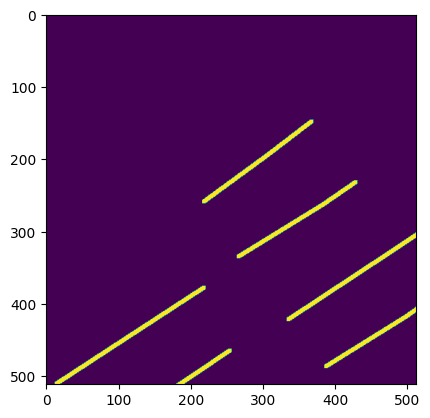

In [37]:
plt.imshow(img)

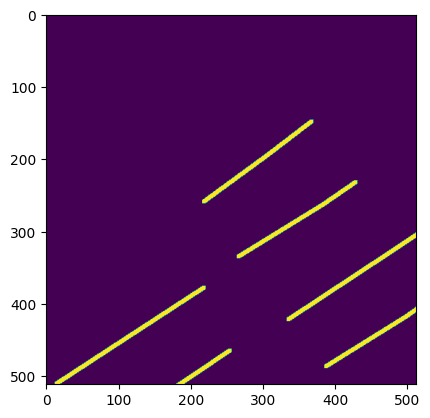

In [46]:
int_img = img.astype(np.uint8)
plt.imshow(int_img)

In [42]:
lineLength = 1
lineGap = 100

In [47]:
lines = cv2.HoughLinesP(int_img, 1, np.pi/180, threshold=100, minLineLength=lineLength, maxLineGap=lineGap)

In [51]:
lines

array([[[ 17, 511, 218, 376]],

       [[ 12, 511, 160, 412]],

       [[319, 306, 430, 232]],

       [[184, 511, 511, 307]],

       [[ 29, 505, 220, 376]],

       [[333, 421, 510, 310]],

       [[216, 261, 369, 150]],

       [[ 12, 510, 102, 450]],

       [[265, 337, 430, 230]],

       [[182, 511, 256, 465]],

       [[ 18, 511, 217, 377]],

       [[216, 259, 369, 147]],

       [[186, 511, 511, 308]],

       [[217, 261, 363, 155]],

       [[443, 347, 511, 304]],

       [[ 14, 511, 430, 231]],

       [[216, 257, 369, 146]],

       [[264, 336, 428, 230]],

       [[218, 258, 369, 148]],

       [[333, 422, 480, 330]],

       [[385, 487, 511, 411]],

       [[ 78, 473, 220, 377]],

       [[385, 485, 511, 410]],

       [[389, 489, 509, 414]],

       [[387, 489, 511, 412]],

       [[267, 337, 395, 254]],

       [[219, 261, 337, 175]],

       [[181, 511, 256, 464]],

       [[264, 335, 426, 230]],

       [[402, 474, 511, 408]],

       [[333, 424, 427, 365]],

       [

In [52]:
line_img = np.zeros_like(img, dtype = np.uint8)

# Draw lines on the blank image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_img, (x1, y1), (x2, y2), (255, 255, 255), 1)  # Adjust line thickness as needed

# Save the image
cv2.imwrite('lines_img.jpg', line_img)

True

## Coordinate extraction

In [2]:
def extract_line_segments(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_ANYDEPTH)
    img = img.astype(np.uint8)
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    line_segments = []
    for contour in contours:
        # Approximate the contour
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Extract line segments (adjust as needed)
        if len(approx) >= 2:
            x1, y1 = approx[0][0]
            x2, y2 = approx[1][0]
            line_segments.append((x1, y1, x2, y2))

    return line_segments

In [3]:
line_segments = extract_line_segments('dilated.tif')

In [4]:
line_segments

[(np.int32(3717), np.int32(9777), np.int32(3586), np.int32(9822)),
 (np.int32(3261), np.int32(9740), np.int32(2652), np.int32(9881)),
 (np.int32(3720), np.int32(9690), np.int32(3522), np.int32(9762)),
 (np.int32(3152), np.int32(9673), np.int32(2627), np.int32(9807)),
 (np.int32(3080), np.int32(9613), np.int32(2607), np.int32(9728)),
 (np.int32(3708), np.int32(9611), np.int32(3598), np.int32(9631)),
 (np.int32(2987), np.int32(9534), np.int32(2607), np.int32(9635)),
 (np.int32(3689), np.int32(9496), np.int32(3544), np.int32(9535)),
 (np.int32(2924), np.int32(9482), np.int32(2613), np.int32(9576)),
 (np.int32(2874), np.int32(9421), np.int32(2595), np.int32(9502)),
 (np.int32(2488), np.int32(9419), np.int32(1551), np.int32(9742)),
 (np.int32(3694), np.int32(9411), np.int32(3267), np.int32(9534)),
 (np.int32(2799), np.int32(9360), np.int32(2591), np.int32(9445)),
 (np.int32(3679), np.int32(9330), np.int32(3203), np.int32(9467)),
 (np.int32(2744), np.int32(9308), np.int32(2569), np.int32(937

In [5]:
len(line_segments)

209

In [27]:
def clip_line_to_tile(x1, y1, x2, y2, tile_origin_x, tile_origin_y, tile_size):
  """Clips a line segment to a tile.

  Args:
      x1, y1: Start coordinates of the line segment.
      x2, y2: End coordinates of the line segment.
      tile_origin_x: X-coordinate of the tile's origin.
      tile_origin_y: Y-coordinate of the tile's origin.
      tile_size: Size of the tile.

  Returns:
      A list of clipped line segments within the tile.
  """

  tile_xmax = tile_origin_x + tile_size
  tile_ymax = tile_origin_y + tile_size

  # Cohen-Sutherland clipping code
  code1 = compute_code(x1, y1, tile_origin_x, tile_origin_y, tile_xmax, tile_ymax)
  code2 = compute_code(x2, y2, tile_origin_x, tile_origin_y, tile_xmax, tile_ymax)

  accept = 0
  reject = 8
  while True:
      if (code1 | code2) == 0:
          # Both endpoints inside the clip region
          return [(x1, y1, x2, y2)]
      elif (code1 & code2) != 0:
          # Both endpoints outside the clip region
          return []
      else:
          # At least one endpoint is outside the clip region
          outcode = code1 if code1 != 0 else code2
          x, y = clip(x1, y1, x2, y2, outcode, tile_origin_x, tile_origin_y, tile_xmax, tile_ymax)
          if outcode == code1:
              x1, y1 = x, y
              code1 = compute_code(x1, y1, tile_origin_x, tile_origin_y, tile_xmax, tile_ymax)
          else:
              x2, y2 = x, y
              code2 = compute_code(x2, y2, tile_origin_x, tile_origin_y, tile_xmax, tile_ymax)

  return [(x1, y1, x2, y2)]

def compute_code(x, y, xmin, ymin, xmax, ymax):
  code = 0
  if y > ymax:
      code |= 8
  elif y < ymin:
      code |= 4
  if x > xmax:
      code |= 2
  elif x < xmin:
      code |= 1
  return code

def clip(x1, y1, x2, y2, code, xmin, ymin, xmax, ymax):
  if code & 8:
      x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
      y = ymax
  elif code & 4:
      x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
      y = ymin
  elif code & 2:
      y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
      x = xmax
  elif code & 1:
      y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
      x = xmin
  return x, y

In [1]:
def find_intersecting_tiles(x1, y1, x2, y2, tile_size, tile_origins):
    """Finds the tiles that intersect with a given line segment.

    Args:
        x1, y1: Start coordinates of the line segment.
        x2, y2: End coordinates of the line segment.
        tile_size: Size of the tiles.
        tile_origins: List of tile origins (x, y).

    Returns:
        A list of tile indices that intersect the line segment.
    """

    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)

    intersecting_tiles = []
    for tile_index, (tile_origin_x, tile_origin_y) in enumerate(tile_origins):
        if xmin < tile_origin_x + tile_size and xmax >= tile_origin_x and \
           ymin < tile_origin_y + tile_size and ymax >= tile_origin_y:
            intersecting_tiles.append(tile_index)

    print(intersecting_tiles)

    return intersecting_tiles

In [2]:
def map_line_segments_to_tiles(line_segments, tile_size, tile_origins):
    """Maps line segments to tiles.

    Args:
        line_segments: List of line segments (x1, y1, x2, y2) in the original image.
        tile_size: Size of the tiles.
        tile_origins: List of tile origins (x, y).

    Returns:
        A dictionary mapping tile indices to lists of line segments within those tiles.
    """

    tile_line_segments = {}

    for line_index, line in enumerate(line_segments):
        x1, y1, x2, y2 = line

        # Find intersecting tiles
        intersecting_tiles = find_intersecting_tiles(x1, y1, x2, y2, tile_size, tile_origins)

        for tile_index in intersecting_tiles:
            tile_origin_x, tile_origin_y = tile_origins[tile_index]
            clipped_lines = clip_line_to_tile(x1, y1, x2, y2, tile_origin_x, tile_origin_y, tile_size)
            tile_line_segments.setdefault(tile_index, []).extend(clipped_lines)

    return tile_line_segments

In [3]:
tile_intersections = map_line_segments_to_tiles(line_segments, 512, [(512, 8704)])

NameError: name 'line_segments' is not defined

In [ ]:
print(tile_intersections)

In [ ]:
list = [(1024, np.float64(9026.45), np.int32(970), np.int32(9053)), (1024, np.float64(8938.712962962964), np.int32(933), np.int32(8980)), (np.int32(972), np.int32(8836), np.int32(759), np.int32(8897))]

In [4]:
def convert_to_local_coordinates(global_line_segments, tile_origin):
    local_line_segments = []

    for x1, y1, x2, y2 in global_line_segments:
        local_x1 = x1 - tile_origin[0]
        local_y1 = y1 - tile_origin[1]
        local_x2 = x2 - tile_origin[0]
        local_y2 = y2 - tile_origin[1]
        local_line_segments.append((local_x1, local_y1, local_x2, local_y2))

    return local_line_segments

In [116]:
local_line_segments = convert_to_local_coordinates(list, [512, 8704])

In [117]:
print(local_line_segments)

[(512, np.float64(322.4500000000007), np.int32(458), np.int32(349)), (512, np.float64(234.7129629629635), np.int32(421), np.int32(276)), (np.int32(460), np.int32(132), np.int32(247), np.int32(193))]


In [118]:
def visualize_tile_with_lines(tile_size, line_segments):
    """Visualizes a tile with overlaid line segments using Matplotlib.

    Args:
        tile_size: Size of the tile.
        line_segments: List of line segments within the tile (x1, y1, x2, y2).
    """

    tile_image = np.zeros((tile_size, tile_size), dtype=np.uint8)
    for x1, y1, x2, y2 in line_segments:
        cv2.line(tile_image, (int(x1), int(y1)), (int(x2), int(y2)), 255, 1)

    fig, ax = plt.subplots()
    extent = (0, tile_size, 0, tile_size)
    ax.imshow(tile_image, cmap='gray', origin='upper', extent=extent)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Tile with Lines')
    plt.show()

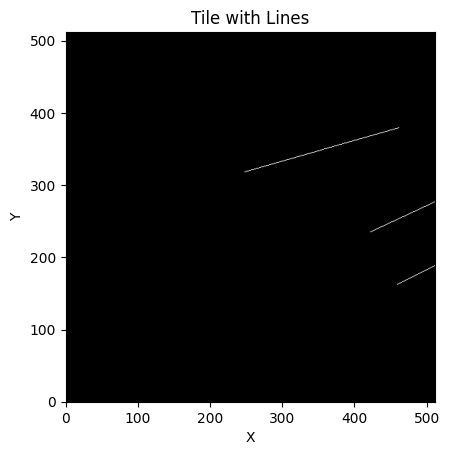

In [119]:
visualize_tile_with_lines(512, local_line_segments)

In [120]:
def extract_line_endpoints(tiff_file):
    with rasterio.open(tiff_file, 'r') as src:
        img = src.read(1)

    img_array = np.array(img, dtype=np.uint8)
    y, x = np.where(img_array > 0)

    endpoints = []
    for i in range(len(x)):
        if x[i] == 0 or x[i] == img_array.shape[1] - 1 or y[i] == 0 or y[i] == img_array.shape[0] - 1:
            endpoints.append((x[i], y[i]))  # Border points

    return endpoints

In [121]:
lines = extract_line_endpoints('dilated.tif')

In [122]:
lines

[(np.int64(9999), np.int64(5396)),
 (np.int64(9999), np.int64(5397)),
 (np.int64(9999), np.int64(5398)),
 (np.int64(9999), np.int64(5399)),
 (np.int64(9999), np.int64(5400)),
 (np.int64(9999), np.int64(5546)),
 (np.int64(9999), np.int64(5547)),
 (np.int64(9999), np.int64(5548)),
 (np.int64(9999), np.int64(5549)),
 (np.int64(9999), np.int64(5550)),
 (np.int64(9999), np.int64(5675)),
 (np.int64(9999), np.int64(5676)),
 (np.int64(9999), np.int64(5677)),
 (np.int64(9999), np.int64(5678)),
 (np.int64(9999), np.int64(5679)),
 (np.int64(9999), np.int64(6050)),
 (np.int64(9999), np.int64(6051)),
 (np.int64(9999), np.int64(6052)),
 (np.int64(9999), np.int64(6053)),
 (np.int64(9999), np.int64(6054))]